In [1]:
#Import necessasry Libabaries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [40]:
# Load the dataset
df = pd.read_csv('Electric_cars_dataset.csv')

In [41]:
# Sample 20,000 random rows from the DataFrame
df = df.sample(n=10000, random_state=42)  # Setting random_state for reproducibility

In [42]:
df.head()

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
38514,EV45181,1G1FW6S06N,King,ENUMCLAW,WA,98022.0,2022.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,166559368,POINT (-121.991415 47.199452),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.5
4399,EV69055,WVWKR7AU5K,King,SAMMAMISH,WA,98075.0,2019.0,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,125,0,41.0,3595182,POINT (-122.028168 47.586173),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),22.2
48712,EV60667,WDDVP9AB5H,King,TUKWILA,WA,98188.0,2017.0,MERCEDES-BENZ,B-CLASS,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,11.0,180632266,POINT (-122.276826 47.449726),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),36
59228,EV89394,5YJSA1CG1D,King,SEATTLE,WA,98178.0,2013.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,37.0,8032475,POINT (-122.249664 47.497442),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),33.89
25408,EV79353,5YJ3E1EB5L,King,SEATTLE,WA,98121.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,43.0,112536070,POINT (-122.34619 47.615293),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),50


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 38514 to 24847
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 10000 non-null  object 
 1   VIN (1-10)                                         10000 non-null  object 
 2   County                                             9999 non-null   object 
 3   City                                               9999 non-null   object 
 4   State                                              9998 non-null   object 
 5   ZIP Code                                           10000 non-null  float64
 6   Model Year                                         9999 non-null   float64
 7   Make                                               9999 non-null   object 
 8   Model                                              9996 non-null   object 
 9   Electri

In [44]:
df.isnull().sum()

ID                                                     0
VIN (1-10)                                             0
County                                                 1
City                                                   1
State                                                  2
ZIP Code                                               0
Model Year                                             1
Make                                                   1
Model                                                  4
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                  21
DOL Vehicle ID                                         0
Vehicle Location                                      92
Electric Utility                                     118
Expected Price ($1k)           

In [45]:
# Fill missing values based on column type and meaning

df['ZIP Code'].fillna(df['ZIP Code'].mode()[0], inplace=True) 
df['Model Year'].fillna(df['Model Year'].median(), inplace=True)  
df['Legislative District'].fillna(df['Legislative District'].median(), inplace=True) 
df['County'].fillna(df['County'].mode()[0], inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)
df['State'].fillna(df['State'].mode()[0], inplace=True)
df['Make'].fillna(df['Make'].mode()[0], inplace=True)
df['Model'].fillna(df['Model'].mode()[0], inplace=True)
df['Vehicle Location'].fillna(df['Vehicle Location'].mode()[0], inplace=True)
df['Electric Utility'].fillna(df['Electric Utility'].mode()[0], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_1236\3816114637.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ZIP Code'].fillna(df['ZIP Code'].mode()[0], inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1236\3816114637.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [46]:
df.isnull().sum()

ID                                                   0
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
ZIP Code                                             0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
Expected Price ($1k)                                 0
dtype: int

In [47]:
df = df.drop('ID', axis=1)

In [48]:
df

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
38514,1G1FW6S06N,King,ENUMCLAW,WA,98022.0,2022.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,166559368,POINT (-121.991415 47.199452),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.5
4399,WVWKR7AU5K,King,SAMMAMISH,WA,98075.0,2019.0,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,125,0,41.0,3595182,POINT (-122.028168 47.586173),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),22.2
48712,WDDVP9AB5H,King,TUKWILA,WA,98188.0,2017.0,MERCEDES-BENZ,B-CLASS,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,11.0,180632266,POINT (-122.276826 47.449726),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),36
59228,5YJSA1CG1D,King,SEATTLE,WA,98178.0,2013.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,37.0,8032475,POINT (-122.249664 47.497442),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),33.89
25408,5YJ3E1EB5L,King,SEATTLE,WA,98121.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,43.0,112536070,POINT (-122.34619 47.615293),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43145,1G1FW6S08H,Thurston,OLYMPIA,WA,98501.0,2017.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,22.0,115834729,POINT (-122.874042 46.998873),PUGET SOUND ENERGY INC,20
60147,1G1FW6S0XJ,King,DUVALL,WA,98019.0,2018.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,45.0,330805828,POINT (-121.876276 47.735749),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),22.857
59717,5YJYGAEEXM,Pierce,LAKE TAPPS,WA,98391.0,2021.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,181094189,POINT (-122.170798 47.184615),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),73
3012,5YJ3E1EAXK,King,SEATTLE,WA,98105.0,2019.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,46.0,476927076,POINT (-122.298657 47.663771),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),57


In [49]:
# Assuming your DataFrame is named df
df = df.drop_duplicates()

In [50]:
# Import the required module
from scipy import stats

# Handle outliers using Z-score
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]  # Keep rows where all numeric columns are within 3 standard deviations

print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (9691, 17)


In [51]:
# Label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Make']= label_encoder.fit_transform(df['Make'])
df['Model']= label_encoder.fit_transform(df['Model'])
df['Electric Vehicle Type']= label_encoder.fit_transform(df['Electric Vehicle Type'])
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']= label_encoder.fit_transform(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
df['Electric Utility']= label_encoder.fit_transform(df['Electric Utility'])
df['County']= label_encoder.fit_transform(df['County'])
df['City']= label_encoder.fit_transform(df['City'])
df['Vehicle Location']= label_encoder.fit_transform(df['Vehicle Location'])
df['VIN (1-10)']= label_encoder.fit_transform(df['VIN (1-10)'])
df['State']= label_encoder.fit_transform(df['State'])
df['Expected Price ($1k)']= label_encoder.fit_transform(df['Expected Price ($1k)'])

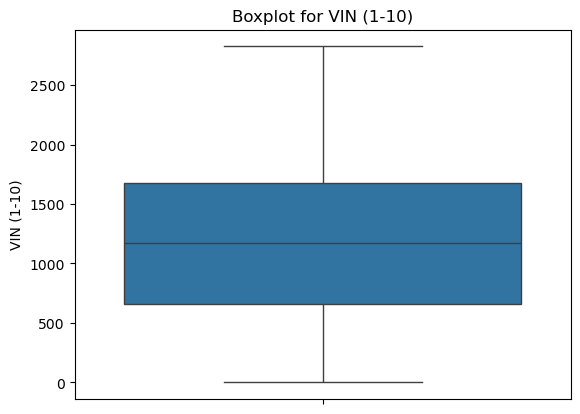

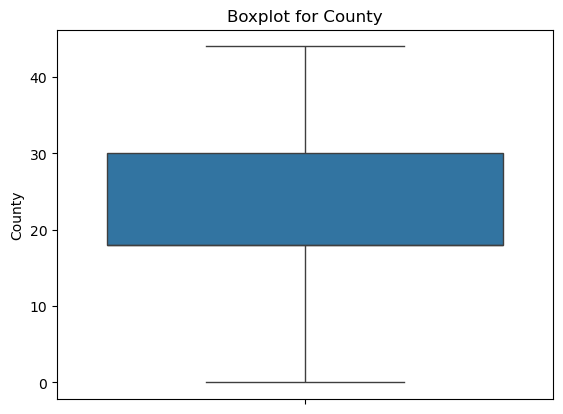

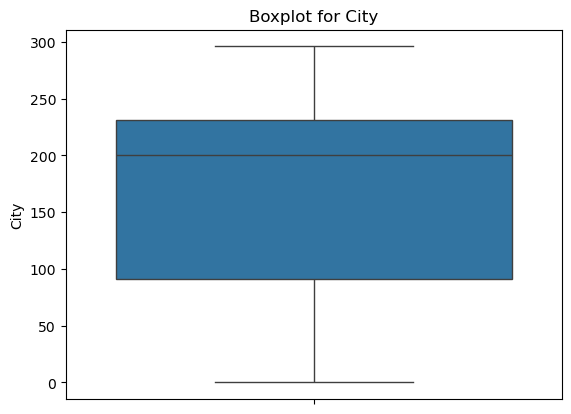

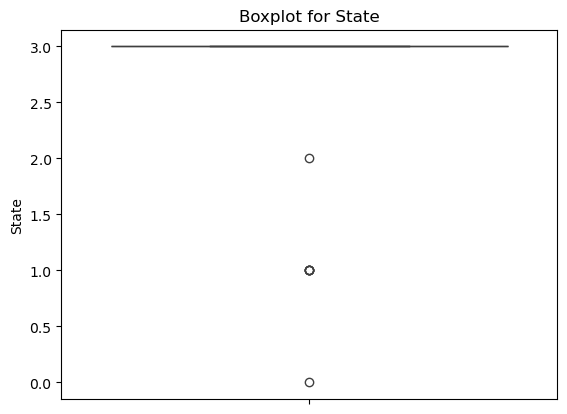

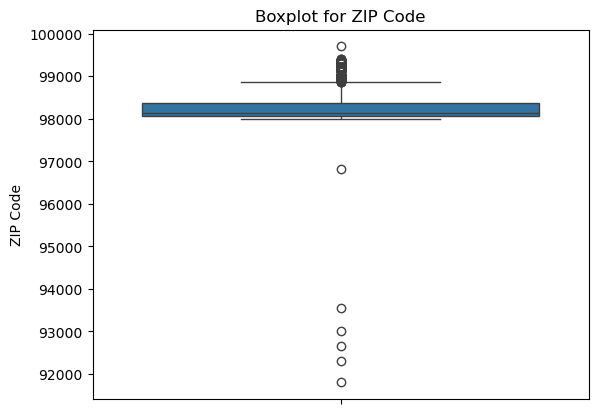

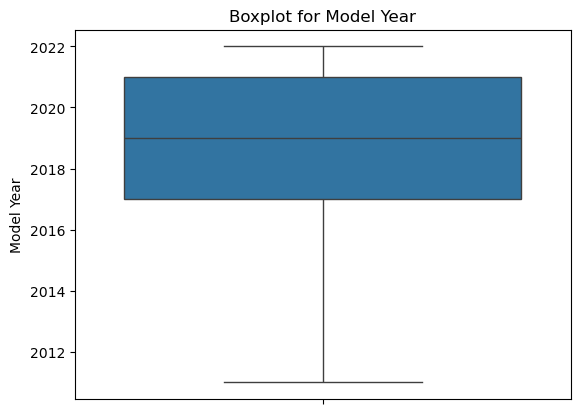

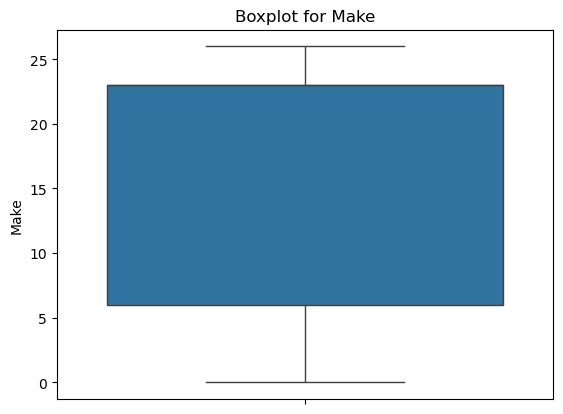

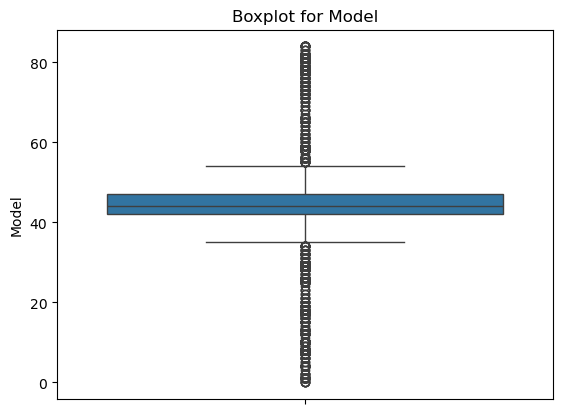

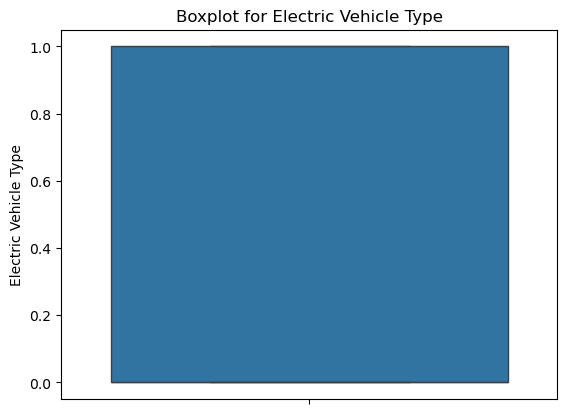

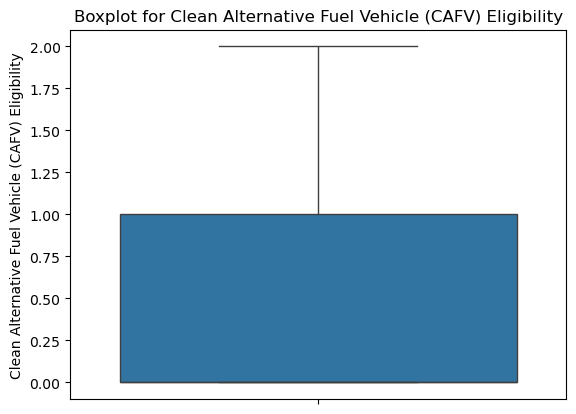

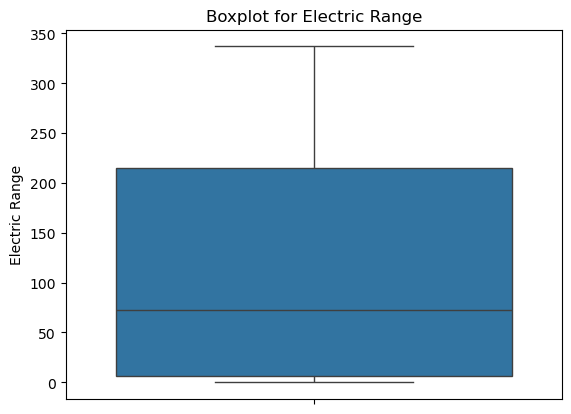

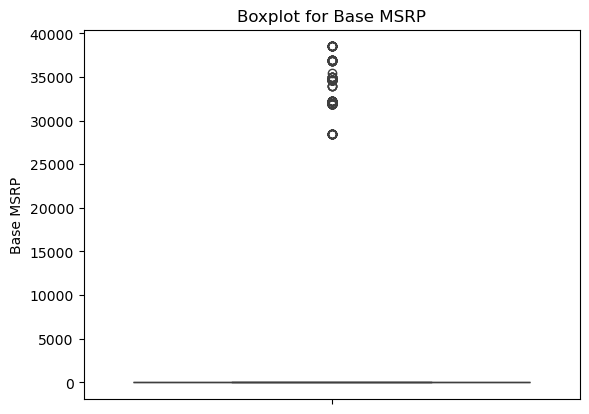

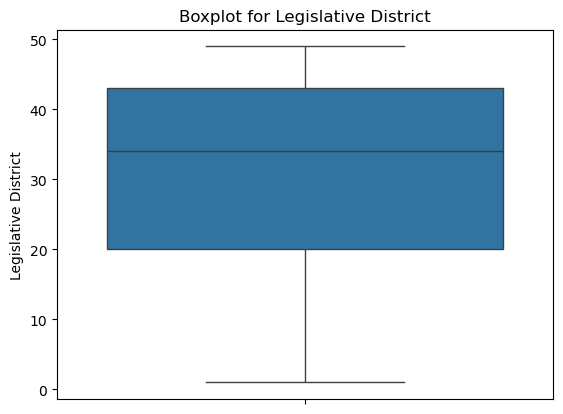

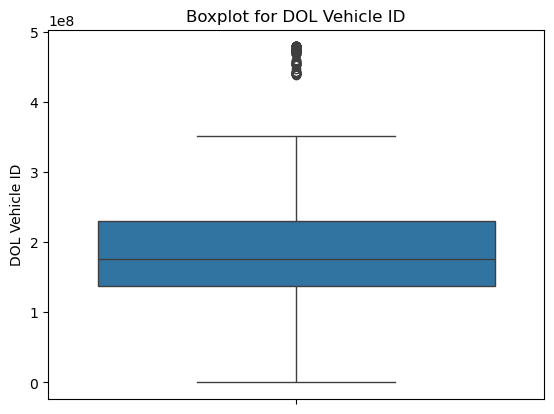

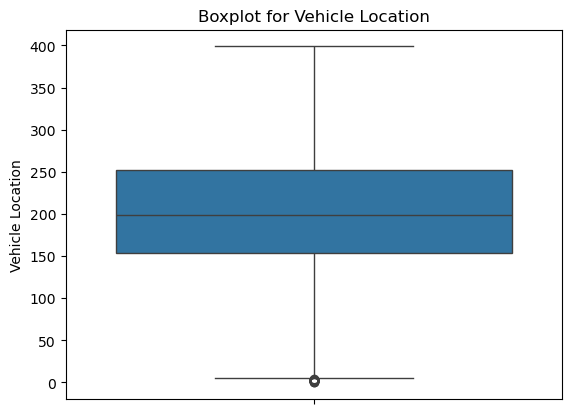

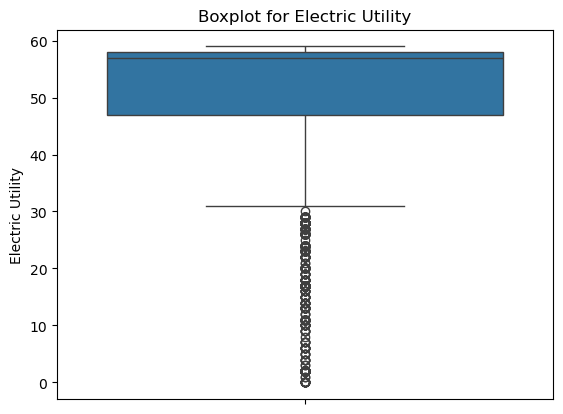

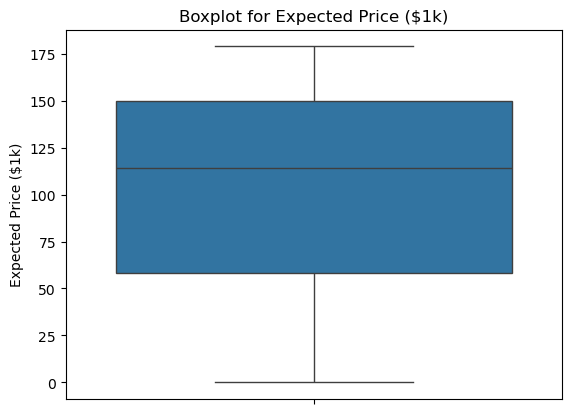

NameError: name 'numerical_cols' is not defined

In [52]:
# Visuals of outliers with boxplots for numeric columns
for col in df:
    sns.boxplot(df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# Example: Using the IQR method to remove outliers
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [53]:
# Define target and features
# List of column names you want to use as features
feature_columns = [ 
    'Make', 
    'Model', 
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 
    'Electric Range'
]

X = df[feature_columns]
y=df['Expected Price ($1k)']

In [54]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR  # Make sure SVR is also imported

# Initialize and evaluate the RBF kernel SVR model
svr_rbf = SVR(kernel='rbf')
rbf_scores = cross_val_score(svr_rbf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("RBF Kernel CV Score:", rbf_scores.mean())


RBF Kernel CV Score: -1285.3751588807268


In [56]:
svr_rbf.fit(X_train, y_train)

SVR()

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = svr_rbf.predict(X_test)

# Evaluate the model using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

# Perform cross-validation to get an average performance score
cv_scores = cross_val_score(svr_rbf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
avg_mse = -cv_scores.mean()  # Convert to positive MSE
print("Average Cross-Validated MSE:", avg_mse)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error (MAE): 23.062620504253932
Mean Squared Error (MSE): 1239.6548708351747
Root Mean Squared Error (RMSE): 35.20873287744355
R-squared (R²): 0.4935764522444839
Average Cross-Validated MSE: 1285.3751588807268
